## **SANDRA MARIA JOSEPH**

Using any Deep-learning framework(Tensorflow, PyTorch, Keras etc), create a classifier
or detector using imagenet pretrained weights to process video instead of images.Also
Show the prediction probability real-time any where in the video .Make the probability
green in color if it’s above 80 otherwise red.

***Residual Network (ResNet) is one of the famous deep learning models that was introduced by Shaoqing Ren, Kaiming He, Jian Sun, and Xiangyu Zhang in their paper. The paper was named “Deep Residual Learning for Image Recognition” in 2015. The ResNet model is one of the popular and most successful deep learning models so far.***


In [ ]:
#importing packages

from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet,
        inception_v3
    )
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2
import math
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing import image

In [ ]:
#path of the Video

path='/content/drive/MyDrive/dog.gif'

In [ ]:
def path_to_video(path):
  # storing the frames from training videos
  count=0

  # RESNET_MODEL 
  resnet_model = resnet50.ResNet50(weights='imagenet')

  # capturing the video from the given path
  cap = cv2.VideoCapture(path)   
  
  #frame rate
  frameRate = cap.get(5) 
  x=1
  while(cap.isOpened()):
    # current frame number
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        # storing the frames in a new folder named train_1
        filename ='/content/drive/MyDrive/train_1/' + 'dog' +"_frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
  cap.release()

  frames=os.listdir('/content/drive/MyDrive/train_1/')

  images=[]

  #iterating each frame
  for i in frames:
    img1 = image.load_img('/content/drive/MyDrive/train_1/'+str(i), target_size=(224,224,3))
    img = image.img_to_array(img1)
    
    image_batch = np.expand_dims(img, axis=0)
    print('image batch size', image_batch.shape)

    
    # prepare the image for the Resnet model
    processed_image = resnet50.preprocess_input(image_batch.copy())

    # get the predicted probabilities for each class
    predictions = resnet_model.predict(processed_image)

    # we will get top 5 predictions which is the default
    label_vgg = decode_predictions(predictions)

   # Finding class with maximum probability
    max_prob=0
    max_class=''


    for prediction_id in range(len(label_vgg[0])):
        class_probs = label_vgg[0][prediction_id]
        name=class_probs[1]
        probs = class_probs[2]
        if probs>max_prob:
          max_prob=probs
          max_class=name

    print(max_class,max_prob)

    plot_image(max_prob,img1,max_class)


image batch size (1, 224, 224, 3)
basenji 0.36534986
0.365
image batch size (1, 224, 224, 3)
dingo 0.47446814
0.474
image batch size (1, 224, 224, 3)
dingo 0.6340836
0.634
image batch size (1, 224, 224, 3)
basenji 0.5019271
0.502
image batch size (1, 224, 224, 3)
Pembroke 0.3395321
0.34
image batch size (1, 224, 224, 3)
basenji 0.36534986
0.365
image batch size (1, 224, 224, 3)
Pembroke 0.3395321
0.34
image batch size (1, 224, 224, 3)
dingo 0.6340836
0.634
image batch size (1, 224, 224, 3)
dingo 0.47446814
0.474
image batch size (1, 224, 224, 3)
basenji 0.5019271
0.502


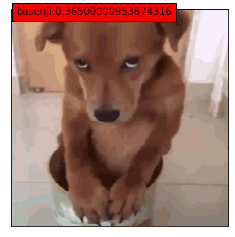

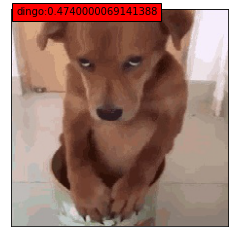

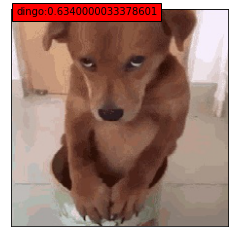

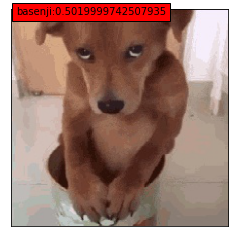

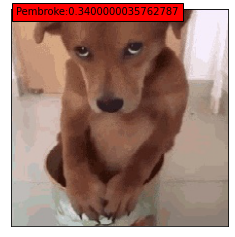

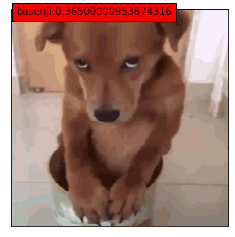

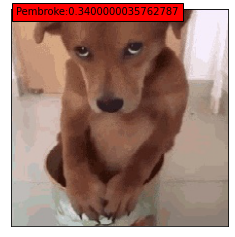

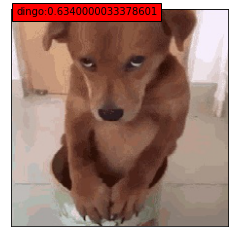

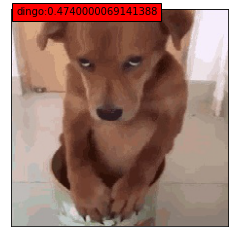

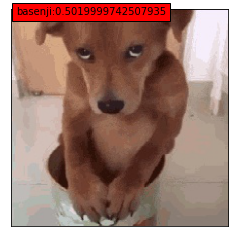

In [ ]:
path_to_video(path)

In [ ]:
def plot_image(predictions, target_images,target_class):
  # Set target image
  target_image = target_images
  # Predicted label
  predicted_label = np.argmax(predictions)  # find the index of max value
  max_prob = np.round(np.max(predictions),3)
  
  #print(max_prob)
  # Show image
  fig = plt.figure()
  ax = fig.add_subplot(111)
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  if max_prob<0.8:
    plt.text(s='{}:{}'.format(target_class,np.round(max_prob,3)),x=5,y=6,bbox=dict(facecolor='red'))
  else:
    plt.text(s='{}:{}'.format(target_class,max_prob),x=5,y=6,bbox=dict(facecolor='green'))
